# Векторные модели. Эмбединги.
При работе с текстом встает проблема - компьютер понимает числа/вектора, с сырым текстом он работать не умеет?  
Поэтому решено было каждому слову/токену сопоставлять какой-то вектор. Желательно чтобы этот вектор был еще каким-то осмысленным, то есть похожие по смыслу слова, должны иметь "близкие" вектора.  
Существует гипотеза, что значение слова определяется его контекстом — иначе говоря, словами, которые встречаются рядом с этим словом в тексте. 
И эта гипотеза используется при обучении таких векторов.  
За последние десятилетия произошло значительное развитие в представление слов. И сегодня посмотрим на основные шаги в этом процессе.

# One-Hot Encoding
Самый очевидный способ. Мы имеем какой-то словарь и для этого словаря строим матрицу размером `VxV`, где V - размер словаря.
Каждая строчка в этой матрице соответствует вектору слова из словаря. Каждый вектор имеет только одну единицу и стоит она на порядковом номере слова.
Выглядит это следующим образом:  
![](./one-hot_encodding.png)

Минусы:
- У нас получаются очень большие вектора для слов
- Они не несут никакой смысловой нагрузки

Данные вектора можно использовать для самых простых описаний текстов - Если сложить вектора всех слов в тексте то вы просто получите вектор, в котором подсчитали количество каждого слова. Далее этот вектор можно по разному модернизировать и использовать в моделях. Вы увидите что-то похожее в методах CountVectorizer/TF-IDF.

# Матрица совстречаемости слов. Co-occurence Matrix
Создадим матрицу `VxV`, где V - это размер словаря. В ячейках матрицы будем подсчитывать количество совместных встречаний этих слов.
Для этого определим размер окна - пусть будет 3 слова. И шагаем с этим окном по тексту, смотрим какие слова в него попадают и повышем соответствующие значения в ячейках матрицы.

Как итог получим матрицу такого же размера как и у One-Hot-encoding. Но эта матрица уже имеет намного больше информации.
Следующий шаг - сжать эту матрицу до приемлемых размеров. Делается это с помощью [PCA](https://habr.com/ru/post/304214/)


Плюсы:
- Эта матрица уже хранит семантические отношения между словами, и вектора близких слов будут более похожи, чем далеких.
- Быстро учится

Минусы:
- Что делать с новыми словам? Заново делать матрицу?
- Матрица получается очень разреженной, многие слова никогда не встречаются вместе, и это может быть проблемой при SVD разложении

# Word2Vec/W2V (2013г)
Однослойная нейросеть которая, обучаясь на корпусе тектов, учится предсказывать либо по контектсту пропущенное слово, либо по слову контекст.
Сейчас иногда это уже общее название для совокупности моделей на основе искусственных нейронных сетей, предназначенных для получения векторных представлений слов на естественном языке.   
В оригинальной статье предложено две архитектуры:
1) CBOW (Continuous Bag-of-Words) — модель предсказывает текущее слово по контексту
2) Skip-Gram — модель предсказывает контекст слова

Как происходит обучение:
- Токенизируете ваш корпус текстов
- Составляете ваш словарь основываясь на частоте слов
- Формируете выборку для обучения состоящую из примеров:   
    (Input:Центральное слово, Output: Слово из контекста) или (Input: Слово из контекста, Output: Центральное слово)

Ниже вы показано, что мы считаем контекстом, а что текущим словом:  
![word_context.png](./word_context.png)


**Здесь сразу виден первый параметр модели** - какой размер контекста нам необходимо выбрать?

![cbow_skipgram.png](./cbow_skipgram.png)

**Как понять по векторам что слова близки по смыслу?**
Ранее мы говорили что модели эмбединга учатся семантическим связям между словами и близкие по смыслу слова должны иметь похожие вектора.  
Для векторов есть такое понятие как - косинусное расстояние. По сути оно показывает на сколько близко ориентированы векторы в пространстве, смотрят ли они в одну сторону. 

Пример:
+ король: мужчина = королева: женщина $\Rightarrow$
+ король - мужчина + женщина = королева

![w2v](https://cdn-images-1.medium.com/max/2600/1*sXNXYfAqfLUeiDXPCo130w.png)  
Ещё про механику с картинками [тут](https://habr.com/ru/post/446530/)

# GloVe: Global Vectors for Word Representation (2014г)
Данный метод как раз основывается на матрице совстречаемости слов. Эта матрица из абсолютных значений преобразуется в относительные.
И затем строится модель, которой на вход подается два слова, на выходе должны получить значение близкое к значению из относительной матрицы на пересечении этих слов. [Схема описана очень грубо, можно прочитать более подробную информацию здесь.](https://sahiltinky94.medium.com/word-embedding-glove-dd27f630c663)

Векторы полученные с помощью GloVe, на мой взляд, имеют лучше качество чем Word2Vec.

# FastText
Самая главная проблема у предыдущих алгоритмов в том что не ясно что делать с неизвестными словами. Они решили этот вопрос просто - создали универсальный токен для всех независимых слов.
FastText сделал иначе, он строит эмбединги не только слов но и буквенных нграмм.

# BERT/GPT/ELMo/etc

Это уже более сложные модели, основанные на современных архитектурах нейройнных сетей.  
С помощью этих моделей мы получаем не статитчные эмбединги, а учитываем текущий контекст слова, так как само слово может иметь множественные значения и контекст "позволяет выбрать" подходящий смысловой вектор для конркетного случая.
[Больше интересной информации вы можете найти в этой статье.](https://habr.com/ru/post/487358/)

# Gensim
Использовать предобученную модель эмбеддингов или обучить свою можно с помощью библиотеки `gensim`. Вот ее [документация](https://radimrehurek.com/gensim/models/word2vec.html). Вообще-то `gensim` — библиотека для тематического моделирования текстов, но один из компонентов в ней — реализация на python алгоритмов из библиотеки word2vec (которая в оригинале была написана на C++).

Если gensim у вас не стоит, то ставим: `pip install gensim`.

In [4]:
!pip install gensim

     |████████████████████████████████| 24.0 MB 34.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/u14510182/Documents/python_for_nlp_stud/venv/bin/python -m pip install --upgrade pip' command.


In [5]:
import gensim
import logging
import urllib.request

import warnings
warnings.filterwarnings('ignore')

## Как обучить свою модель

Обратите внимание, что тренировка модели не включает препроцессинг! Это значит, что избавляться от пунктуации, приводить слова к нижнему регистру, лемматизировать их, проставлять частеречные теги придется до тренировки модели (если, конечно, это необходимо для вашей задачи). Т.е. в каком виде слова будут в исходном тексте, в таком они будут и в модели.

Поскольку иногда тренировка модели занимает много времени, то можно ещё вести лог событий, чтобы понимать, что на каком этапе происходит.

In [6]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

На вход модели даем текстовый файл, каждое предложение на отдельной строчке. Вот игрушечный пример с текстом «Бедной Лизы». Он заранее очищен от пунктуации, приведен к нижнему регистру и лемматизирован.

In [8]:
f = 'liza_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

Инициализируем модель. Основные параметры:

+ данные должны быть итерируемым объектом
+ size — размер вектора,
+ window — размер окна наблюдения,
+ min_count — мин. частотность слова в корпусе,
+ sg — используемый алгоритм обучения (0 — CBOW, 1 — Skip-gram),
+ sample — порог для downsampling'a высокочастотных слов,
+ workers — количество потоков,
+ alpha — learning rate,
+ iter — количество итераций,
+ max_vocab_size — позволяет выставить ограничение по памяти при создании словаря (т.е. если ограничение привышается, то низкочастотные слова будут выбрасываться). Для сравнения: 10 млн слов = 1Гб RAM.

In [10]:
%time model_liza = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=2)#в последней версии vector_size

2022-10-22 13:47:10,671 : INFO : collecting all words and their counts
2022-10-22 13:47:10,672 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-10-22 13:47:10,675 : INFO : collected 1213 word types from a corpus of 3109 raw words and 392 sentences
2022-10-22 13:47:10,676 : INFO : Creating a fresh vocabulary
2022-10-22 13:47:10,679 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 478 unique words (39.41% of original 1213, drops 735)', 'datetime': '2022-10-22T13:47:10.679605', 'gensim': '4.2.0', 'python': '3.9.6 (v3.9.6:db3ff76da1, Jun 28 2021, 11:49:53) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2022-10-22 13:47:10,680 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 2374 word corpus (76.36% of original 3109, drops 735)', 'datetime': '2022-10-22T13:47:10.680511', 'gensim': '4.2.0', 'python': '3.9.6 (v3.9.6:db3ff76da1, Jun 28 2021, 11:49:53) \n[Clang 

CPU times: user 61.9 ms, sys: 10.7 ms, total: 72.7 ms
Wall time: 66.3 ms


Можно нормализовать вектора, тогда модель будет занимать меньше RAM. Однако после этого её нельзя дотренировывать. Здесь используется L2-нормализация: вектора нормализуются так, что если сложить квадраты всех элементов вектора, в сумме получится 1.

In [13]:
model_liza.init_sims(replace=True)
model_path = "liza.bin"

print("Saving model...")
model_liza.wv.save_word2vec_format(model_path, binary=True)
print("Done")

2022-10-22 13:48:37,743 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency
2022-10-22 13:48:37,745 : INFO : storing 478x300 projection weights into liza.bin


Saving model...
Done


Смотрим, сколько в модели слов:

In [18]:
# print(len(model_liza.wv.vocab)) # old
len(model_liza.wv.key_to_index) # new

478

In [20]:
print(sorted([w for w in model_liza.wv.key_to_index]))

['анюта', 'армия', 'ах', 'барин', 'бедный', 'белый', 'берег', 'березовый', 'беречь', 'бесчисленный', 'благодарить', 'бледный', 'блеснуть', 'блестящий', 'близ', 'бог', 'богатый', 'большой', 'бояться', 'брать', 'бросать', 'бросаться', 'бывать', 'быть', 'важный', 'ввечеру', 'вдова', 'велеть', 'великий', 'великолепный', 'верить', 'верно', 'весело', 'веселый', 'весна', 'вести', 'весь', 'весьма', 'ветвь', 'ветер', 'вечер', 'взглядывать', 'вздох', 'вздыхать', 'взор', 'взять', 'вид', 'видеть', 'видеться', 'видный', 'вместе', 'вода', 'возвращаться', 'воздух', 'война', 'воображать', 'воображение', 'воспоминание', 'восторг', 'восхищаться', 'время', 'все', 'вслед', 'вставать', 'встречаться', 'всякий', 'высокий', 'выть', 'выходить', 'глаз', 'глубокий', 'гнать', 'говорить', 'год', 'голос', 'гора', 'горе', 'горестный', 'горлица', 'город', 'горький', 'господь', 'гром', 'грусть', 'давать', 'давно', 'далее', 'дверь', 'движение', 'двор', 'девушка', 'дело', 'день', 'деньги', 'деревня', 'деревянный', 'деся

И чему же мы ее научили? Попробуем оценить модель вручную, порешав примеры. Несколько дано ниже, попробуйте придумать свои.

In [21]:
model_liza.wv.most_similar(positive=["смерть", "любовь"], negative=["печальный"], topn=1)

[('проходить', 0.18653517961502075)]

In [22]:
model_liza.wv.most_similar("любовь", topn=3)

[('выть', 0.2030768096446991),
 ('нежный', 0.1860518455505371),
 ('лодка', 0.1758255660533905)]

In [23]:
model_liza.wv.similarity("лиза", "эраст")

0.14449573

In [24]:
model_liza.wv.doesnt_match("скорбь грусть слеза улыбка".split())

'слеза'

#### Параметры варьирования

1) препроцессинг -- лемматизировать или нет, например, вдруг мы хотим посмотреть на морфологические пропорции? тогда лемматизировать не нужно

2) размер корпуса -- чем больше, тем лучше, но! не для семантических задач -- для них важнее качество

3) размер словаря

4) negative samples

5) количество итераций

6) длина вектора -- 100-300 (судя по всему, >300 не сильно улучшает результаты)

7) длина окна -- для синтаксических задач, примерно 4, для семантических задач, большое окно, 8, 10.

Хорошая статья про сравнение моделей с варьированием параметров: https://www.aclweb.org/anthology/D14-1162.pdf

#### Как использовать готовую модель

#### RusVectōrēs

На сайте RusVectōrēs (https://rusvectores.org/ru/) собраны предобученные на различных данных модели для русского языка, а также можно поискать наиболее близкие слова к заданному, посчитать семантическую близость нескольких слов и порешать примеры с помощью «калькулятором семантической близости».

Для других языков также можно найти предобученные модели — например, модели [fastText](https://fasttext.cc/docs/en/english-vectors.html) и [GloVe](https://nlp.stanford.edu/projects/glove/)

Ещё давайте посмотрим на **векторные романы** https://nevmenandr.github.io/novel2vec/

#### Работа с моделью

Модели word2vec бывают разных форматов:

+ .vec.gz — обычный файл
+ .bin.gz — бинарник

Загружаются они с помощью одного и того же класса `KeyedVectors`, меняется только параметр `binary` у функции `load_word2vec_format`.

Если же эмбеддинги обучены не с помощью word2vec, то для загрузки нужно использовать функцию `load`. Т.е. для загрузки предобученных эмбеддингов `glove`, `fasttext`, `bpe` и любых других нужна именно она.

Скачаем с RusVectōrēs модель для русского языка, обученную на НКРЯ образца 2015 г.

In [ ]:
urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")

HTTPError: HTTP Error 403: Forbidden

In [15]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

2021-10-13 06:34:39,254 : INFO : loading projection weights from ruscorpora_mystem_cbow_300_2_2015.bin.gz
2021-10-13 06:34:53,828 : INFO : loaded (281776, 300) matrix from ruscorpora_mystem_cbow_300_2_2015.bin.gz


**Мини-исследование**: Давайте протестируем, выделяет ли модель функцию интенсификации в прилагательных? Например, *ужасный курильщик* может интерпретироваться как *человек, который много курит*, а не только как (не столько как) *очень плохой человек-курильщик*. Объединяет ли модель *плохой, ужасный, жуткий, страшный* по отрицательной полярности и объединяет ли она *ужасный, жуткий, страшный* по функции интенсификации?

In [16]:
words = ['хороший_A', 'плохой_A', 'ужасный_A','жуткий_A', 'страшный_A', 'красный_A', 'синий_A']

Частеречные тэги нужны, поскольку это специфика скачанной модели - она была натренирована на словах, аннотированных их частями речи (и лемматизированных). NB! В названиях моделей на `rusvectores` указано, какой тегсет они используют (mystem, upos и т.д.)

Попросим у модели 10 ближайших соседей для каждого слова и коэффициент косинусной близости для каждого:


In [17]:
for word in words:
    # есть ли слово в модели? 
    if word in model:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)

2021-10-13 06:35:02,031 : INFO : precomputing L2-norms of word weight vectors


хороший_A
[ 0.00722357 -0.00361956  0.1272455   0.06584469  0.00709477 -0.02014845
 -0.02056034  0.01321563  0.13692418 -0.09624264]
плохой_A 0.7463520765304565
неплохой_A 0.6708558797836304
отличный_A 0.6633436679840088
превосходный_A 0.6079519987106323
замечательный_A 0.586450457572937
недурной_A 0.5322482585906982
отменный_A 0.5168066024780273
прекрасный_A 0.4982393980026245
посредственный_A 0.49099433422088623
приличный_A 0.48622459173202515


плохой_A
[-0.05218472  0.0307817   0.1459371   0.0151835   0.06219714  0.01153753
 -0.01169093  0.01818374  0.0955373  -0.10191503]
хороший_A 0.7463520765304565
дурной_A 0.6186875104904175
скверный_A 0.6014161109924316
отличный_A 0.5226833820343018
посредственный_A 0.5061030983924866
неважный_A 0.5021152496337891
неплохой_A 0.49169060587882996
никудышный_A 0.48035892844200134
ухудшать_V 0.43680477142333984
плохо_ADV 0.4314875304698944


ужасный_A
[-0.05553271 -0.03172469  0.01998607  0.00171507 -0.00935555 -0.0296017
  0.05394973  0.01597532 

Находим косинусную близость пары слов:

In [18]:
print(model.similarity('плохой_A', 'хороший_A'))

0.74635214


In [19]:
print(model.similarity('плохой_A', 'синий_A'))

-0.12778337


In [20]:
print(model.similarity('ужасный_A', 'жуткий_A'))

0.69825286


Попробуем составить пропорцию:

+ positive — вектора, которые мы складываем
+ negative — вектора, которые вычитаем

In [21]:
print(model.most_similar(positive=['плохой_A', 'ужасный_A'], negative=['хороший_A'])[0][0])

страшный_A


Найди лишнее!

In [22]:
print(model.doesnt_match('плохой_A хороший_A ужасный_A страшный_A'.split()))

хороший_A


In [23]:
print(model.doesnt_match('плохой_A ужасный_A страшный_A'.split()))

плохой_A


In [24]:
for word, score in model.most_similar(positive=['ужасно_ADV'], negative=['плохой_A']):
    print(f'{score:.4}\t{word}')

0.5575	безумно_ADV
0.4791	безмерно_ADV
0.4536	жутко_ADV
0.4472	невероятно_ADV
0.4394	очень_ADV
0.4364	чертовски_ADV
0.4231	страшно_ADV
0.4124	необычайно_ADV
0.4119	нестерпимо_ADV
0.4005	необыкновенно_ADV


Что означают полученные результаты для нашего исследования? Объединяет ли модель *плохой, ужасный, жуткий, страшный* по отрицательной полярности и объединяет ли она *ужасный, жуткий, страшный* по функции интенсификации?

### Визуализация

Можно использовать разные методы того, как преобразовать векторы так, чтобы можно было их поместить на двумерное пространство, например, с помощью PCA. В зависимости от того, относительно какого набора слов вы пытаетесь найти оптимально отображение на двумерное пространство, у вас могут получаться разные результаты

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
words = ['хороший_A', 'плохой_A', 'ужасный_A','жуткий_A', 'страшный_A', 'красный_A', 'синий_A']
X = model[words]#model.wv[words]

In [28]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

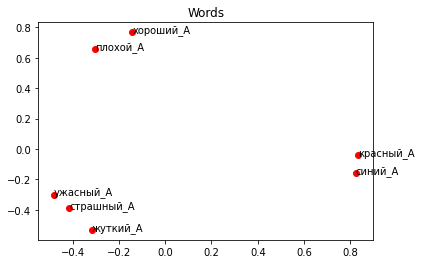

In [29]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

#### Оценка

Это, конечно, хорошо, но как понять, какая модель лучше? Или вот, например, я сделал свою модель, а как понять, насколько она хорошая?

Для этого существуют специальные датасеты для оценки качества дистрибутивных моделей. Основных два: один измеряет точность решения задач на аналогии, а второй используется для оценки коэффициента семантической близости.

#### Word Similarity

Этот метод заключается в том, чтобы оценить, насколько представления о семантической близости слов в модели соотносятся с "представлениями" людей.

| слово 1    | слово 2    | близость |
|------------|------------|----------|
| кошка      | собака     | 0.7      | 
| чашка      | кружка     | 0.9      | 

Для каждой пары слов из заранее заданного датасета мы можем посчитать косинусное расстояние, и получить список таких значений близости. При этом у нас уже есть список значений близостей, сделанный людьми. Мы можем сравнить эти два списка и понять, насколько они похожи (например, посчитав корреляцию). Эта мера схожести должна говорить о том, насколько модель хорошо моделирует расстояния о слова.

#### Аналогии

Другая популярная задача для "внутренней" оценки называется задачей поиска аналогий. Как мы уже разбирали выше, с помощью простых арифметических операций мы можем модифицировать значение слова. Если заранее собрать набор слов-модификаторов, а также слов, которые мы хотим получить в результаты модификации, то на основе подсчёта количества "попаданий" в желаемое слово мы можем оценить, насколько хорошо работает модель.

В качестве слов-модификатор мы можем использовать семантические аналогии. Скажем, если у нас есть некоторое отношение "страна-столица", то для оценки модели мы можем использовать пары наподобие "Россия-Москва", "Норвегия-Осло", и т.д. Датасет будет выглядеть следующм образом:

| слово 1    | слово 2    | отношение     | 
|------------|------------|---------------|
| Россия     | Москва     | страна-столица| 
| Норвегия   | Осло       | страна-столица|

Рассматривая случайные две пары из этого набора, мы хотим, имея триплет (Россия, Москва, Норвегия) хотим получить слово "Осло", т.е. найти такое слово, которое будет находиться в том же отношении со словом "Норвегия", как "Россия" находится с Москвой.

Датасеты для русского языка можно скачать на странице с моделями на RusVectores. Посчитаем качество нашей модели НКРЯ на датасете про аналогии:

In [ ]:
# res = model.accuracy('ru_analogy_tagged.txt') # работает для старых версий gensim

In [ ]:
# for row in res[4]['incorrect'][:10]:
#     print('\t'.join(row))

#### Задание 1

+ Возьмите небольшой кусочек текста или стихотворение.
+ Замените все неслужебные слова в нём на их ближайших соседей из нашей модели.
+ Прокомментируйте результат.

#### Задание 2

+ Возьмите интересный Вам текст.
+ Лемматизируйте текст, отчистите от пунктуации и служебной информации и обучите на нем модель word2vec (поэкспериментируйте с размером окна, с длиной вектора). 
+ Найдите по 5 ближайших слов к нескольким интересующим Вас словам. Обязательно попробуйте взять слова различной частеречной принадлежности, различных семантических классов (абстрактные слова, экспрессивы). Учтите, что слова может не быть в модели!
+ Найдите по 5 "далёких" слов к нескольким интересующим Вас словам. Обязательно попробуйте взять слова различной частеречной принадлежности, различных семантических классов (абстрактные слова, экспрессивы).
+ Прокомментируйте результат.